In [62]:
#list(graph1.predecessors(47007))

In [63]:
#cycle=list(nx.simple_cycles(graph1))

In [65]:
# pos = nx.spring_layout(G_fb)
# betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
# node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
# node_size =  [v * 10000 for v in betCent.values()]
# plt.figure(figsize=(20,20))
# nx.draw_networkx(G_fb, pos=pos, with_labels=False,
#                  node_color=node_color,
#                  node_size=node_size )
# plt.axis('off')

In [66]:
#cycle

In [67]:
# nx.average_shortest_path_length(graph1.to_undirected())
# # for C in (G.subgraph(c).copy() for c in nx.connected_components(G)):
# #     print(nx.average_shortest_path_length(C))

In [68]:
#nx.dfs_successors(graph1, source=123)

In [11]:
def calculate_triads(com):
    global motifs_count1
    global motif_struct
    subgraph = graph1.subgraph(com).copy()
    motifs_count=nx.triads_by_type(subgraph)
    for key in motifs_count:
        if key in motifs_count1:
            motifs_count1[key]=motifs_count1[key]+len(motifs_count[key])
        else:
            motifs_count1[key]=len(motifs_count[key])
    for key in motifs_count:
        if key in motif_struct:
            continue
        else:
            motif_struct[key]=motifs_count[key][0]
    return

In [16]:
motif_struct

{'003': <networkx.classes.digraph.DiGraph at 0x7f5a68029240>,
 '021D': <networkx.classes.digraph.DiGraph at 0x7f5a114e4518>,
 '012': <networkx.classes.digraph.DiGraph at 0x7f5a11423128>,
 '021C': <networkx.classes.digraph.DiGraph at 0x7f5a0b6356a0>,
 '021U': <networkx.classes.digraph.DiGraph at 0x7f59fc30d0f0>,
 '030T': <networkx.classes.digraph.DiGraph at 0x7f59ed7fc6a0>}

In [ ]:
count=0
motifs_count1={}
motif_struct={}
for com in list(nx.weakly_connected_components(graph1))[250:300]:
    print(len(com))
    count+=1
    calculate_triads(com)
    if count%10==0:
        print(f"Completed Components: {count}")

17
2
2
2
3
3
3
15
233


In [91]:
len(com[0])

118

In [69]:
subgraph = graph1.subgraph(com[0])

In [71]:
motifs_count=nx.triads_by_type(subgraph)

In [76]:
triads=list(motifs_count.values())

In [ ]:
#motifs_count

In [78]:
triads[0][0]

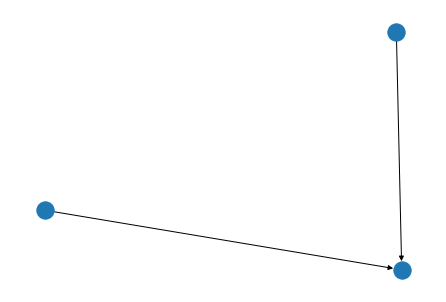

In [88]:
nx.draw(triads[4][0])

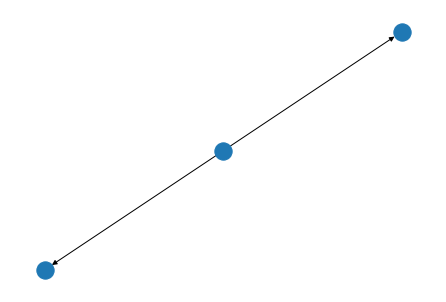

In [89]:
nx.draw(triads[1][0])

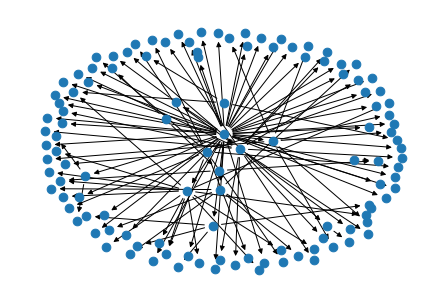

In [102]:
import matplotlib.pyplot as plt
nx.draw(subgraph,pos=nx.spring_layout(subgraph),node_shape='.')
plt.draw()

In [ ]:
#nx.dfs_predecessors(graph1, source=144109)

In [168]:
#mod_ment2[mod_ment2['resId']==87920]

In [169]:
#mod_ment2[mod_ment2['advId']==87920]

In [170]:
#mod_ment2[mod_ment2['advId']==87917]

In [22]:
# def partitions(nodes, n):
#     "Partitions the nodes into n subsets"
#     nodes_iter = iter(nodes)
#     while True:
#         partition = tuple(itertools.islice(nodes_iter,n))
#         if not partition:
#             return
#         yield partition

In [73]:
# p = Pool(processes=4)

In [24]:
# def mod_bet(args):
#     return nx.betweenness_centrality_subset(*args)

In [14]:
#betCent = nx.betweenness_centrality(graph1, normalized=True, endpoints=True)
# sorted(betCent, key=betCent.get, reverse=True)[:5]

In [25]:
#part_generator = 4*len(p._pool)
# node_partitions = list(partitions(graph1.nodes(), int(len(graph1)/3)))
# num_partitions = len(node_partitions)

In [26]:
#num_partitions

4

In [1]:
#bet_map = p.map(mod_bet,zip([graph1]*num_partitions,node_partitions,node_partitions))

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
from tqdm import tqdm
from multiprocessing import Pool
import itertools


def calculate_triads(com):
    global motifs_count1
    global motif_struct
    subgraph = graph1.subgraph(com).copy()
    motifs_count=nx.triads_by_type(subgraph)
    for key in motifs_count:
        if key in motifs_count1:
            motifs_count1[key]=motifs_count1[key]+len(motifs_count[key])
        else:
            motifs_count1[key]=len(motifs_count[key])
    for key in motifs_count:
        if key in motif_struct:
            continue
        else:
            motif_struct[key]=motifs_count[key][0]
    return

if __name__ == "__main__":
    
    folder="dataset_v5/v5_2/"

    mod_ment2 = pd.read_csv(folder+'final_shodhganga_dataset_v5_2.csv', sep =",")

    mod_ment2.shape

    graph1 = nx.convert_matrix.from_pandas_edgelist(mod_ment2, 'advId','resId','publisher_institution', create_using=nx.DiGraph())

    graph1.remove_edges_from(nx.selfloop_edges(graph1))

    cycle=list(nx.simple_cycles(graph1))

    graph1.remove_edges_from(cycle)

    motifs_count1={}
    motif_struct={}
    
    for com in tqdm(list(nx.weakly_connected_components(graph1))):
        count+=1
        calculate_triads(com)